# Python for Data Science

### Dependencies
- Python=3.6
- Pandas
- Jupyter
- Matplotlib
### Additional dependencies for plotting data over map.
- basemap
- basemap-data-hires

## Introduction
We are going to analyze the New York [Vehicle Collision Dataset](https://www.kaggle.com/new-york-city/nypd-motor-vehicle-collisions#nypd-motor-vehicle-collisions.csv). 
The dataset has been unzipped and the resulting size is around 350MB.

**Check file size and see if a header is present.**

In [1]:
!ls -l  nypd-motor-vehicle-collisions.csv

-rw-rw-r--. 1 farhanhubble farhanhubble 360338035 Jun 30 00:10 nypd-motor-vehicle-collisions.csv


In [2]:
!head -1 nypd-motor-vehicle-collisions.csv

DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5


## Load and Clean Data

**Load the Dataset**

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
data = pd.read_csv('./nypd-motor-vehicle-collisions.csv',header=0)

/home/farhanhubble/anaconda3/envs/sapient/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print('Data shape:',data.shape)
data.head()

Data shape: (1294012, 29)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26T00:00:00,0:00,BROOKLYN,11215,40.667470,-73.979290,"{'longitude': '-73.97929', 'needs_recoding': F...",NaN,NaN,506 7 STREET,...,Unspecified,NaN,NaN,NaN,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26T00:00:00,0:00,BROOKLYN,11218,40.641113,-73.966324,"{'longitude': '-73.966324', 'needs_recoding': ...",NaN,NaN,358 ARGYLE ROAD,...,Unspecified,NaN,NaN,NaN,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26T00:00:00,0:00,MANHATTAN,10065,40.766666,-73.967070,"{'longitude': '-73.96707', 'needs_recoding': F...",EAST 65 STREET,PARK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3930150,Sedan,Sedan,NaN,NaN,NaN
3,2018-06-26T00:00:00,0:00,NaN,NaN,40.826275,-73.859710,"{'longitude': '-73.85971', 'needs_recoding': F...",BRUCKNER BOULEVARD,WHITE PLAINS ROAD,NaN,...,Unspecified,NaN,NaN,NaN,3929327,Sedan,Sedan,NaN,NaN,NaN
4,2018-06-26T00:00:00,0:00,NaN,NaN,40.699265,-73.727170,"{'longitude': '-73.72717', 'needs_recoding': F...",CROSS ISLAND PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


**Drop some not-so-useful columns**

In [6]:
data.drop(labels=['ZIP CODE',\
                  'LOCATION',\
                  'ON STREET NAME',\
                  'CROSS STREET NAME',\
                  'OFF STREET NAME',\
                  'CONTRIBUTING FACTOR VEHICLE 2',\
                  'CONTRIBUTING FACTOR VEHICLE 3',\
                  'CONTRIBUTING FACTOR VEHICLE 4',\
                  'CONTRIBUTING FACTOR VEHICLE 5'],axis=1,inplace=True)

In [7]:
print('Data shape:',data.shape)
data.head()

Data shape: (1294012, 20)


,DATE,TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26T00:00:00,0:00,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26T00:00:00,0:00,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26T00:00:00,0:00,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN
3,2018-06-26T00:00:00,0:00,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN
4,2018-06-26T00:00:00,0:00,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


**Combine first two columns and convert to date-time type.**

In [28]:
dates = data.DATE.apply(lambda x:x[:-9])
times = data.TIME

In [34]:
data.drop(columns=['DATE','TIME'],inplace=True)
data.head()

,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN
3,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN
4,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [35]:
data['TIME'] = pd.to_datetime(dates+' '+times)

In [37]:
data.head()

,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
0,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
1,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
2,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
3,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
4,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2018-06-26


**Check which columns have NaN**

In [38]:
data.isnull().any()

BOROUGH                           True
LATITUDE                          True
LONGITUDE                         True
NUMBER OF PERSONS INJURED        False
NUMBER OF PERSONS KILLED         False
NUMBER OF PEDESTRIANS INJURED    False
NUMBER OF PEDESTRIANS KILLED     False
NUMBER OF CYCLIST INJURED        False
NUMBER OF CYCLIST KILLED         False
NUMBER OF MOTORIST INJURED       False
NUMBER OF MOTORIST KILLED        False
CONTRIBUTING FACTOR VEHICLE 1     True
UNIQUE KEY                       False
VEHICLE TYPE CODE 1               True
VEHICLE TYPE CODE 2               True
VEHICLE TYPE CODE 3               True
VEHICLE TYPE CODE 4               True
VEHICLE TYPE CODE 5               True
TIME                             False
dtype: bool

**Removes NaN in Latitude/Longitude**

In [39]:
print(data.LONGITUDE.isnull().sum(),data.LONGITUDE.isnull().sum())

220121 220121


In [40]:
data.dropna(axis=0,how='any',subset=['LATITUDE','LONGITUDE'],inplace=True)

In [41]:
print(data.shape)
data.head()

(1073891, 19)


,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
0,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
1,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
2,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
3,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
4,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2018-06-26


**Drop rows where all vehicle data is NaN**

In [42]:
data.dropna(axis=0,how='all',subset=['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)

In [43]:
print(data.shape)
data.head()

(1064990, 19)


,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
0,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
1,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
2,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
3,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
4,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2018-06-26


**Drop rows where borough is unknown**. 

In [44]:
data.dropna(axis=0,subset=['BOROUGH'], inplace=True)

In [45]:
print(data.shape)
data.head()

(877419, 19)


,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
0,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
1,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
2,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
5,BRONX,40.844788,-73.891680,1,0,0,0,1,0,0,0,Driver Inattention/Distraction,3930216,Sedan,Bike,NaN,NaN,NaN,2018-06-26
6,BROOKLYN,40.606007,-73.955830,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,3929796,Pick-up Truck,Sedan,NaN,NaN,NaN,2018-06-26


# Descriptive Statistics

## Explore the data and maybe clean more.

**Column ranges.**

In [47]:
data.TIME.dt.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012])

In [48]:
data.BOROUGH.unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

**Something seems amiss with the LAT/LONG data.**

In [50]:
print(data.LATITUDE.min(),data.LATITUDE.max())
print(data.LONGITUDE.min(), data.LONGITUDE.max())

0.0 41.12615
-74.25453159999999 0.0


**Actual LAT/LONG range for NewYork city taken from https://www.mapdevelopers.com/geocode_bounding_box.php**
<center><img src='res/ny_bounding_box.png'></center>
<center><img src='res/ny_lat_long.png'></center>

In [51]:
valid_lat  = (data.LATITUDE >= 40.477399) & (data.LATITUDE <= 40.917577)
valid_long = (data.LONGITUDE >= -74.259090) & (data.LONGITUDE <= -73.700272)
valid_coord = valid_lat & valid_long

In [52]:
print('Total latitudes:',data.LATITUDE.count())
print('Valid latitudes:',data.LATITUDE[valid_lat].count())

print('Total longitudes:',data.LONGITUDE.count())
print('Valid longitudes:',data.LONGITUDE[valid_long].count())

Total latitudes: 877419
Valid latitudes: 877197
Total longitudes: 877419
Valid longitudes: 877199


**Remove invalid coordinates.**

In [53]:
data = data[valid_coord]
print(data.shape)

(877197, 19)


**Summary of injuries.**

In [57]:
data['NUMBER OF PERSONS INJURED'].describe()

count    877197.000000
mean          0.247385
std           0.634429
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          43.000000
Name: NUMBER OF PERSONS INJURED, dtype: float64

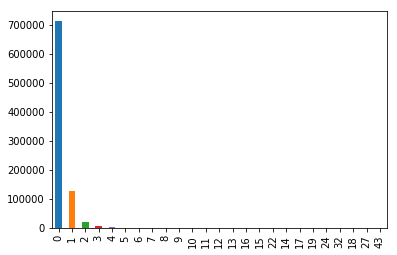

In [67]:
hist_inj = data['NUMBER OF PERSONS INJURED'].value_counts()
hist_inj.plot(kind='bar')

**Summary of deaths.**

In [68]:
data['NUMBER OF PERSONS KILLED'].describe()

count    877197.000000
mean          0.001051
std           0.034844
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: NUMBER OF PERSONS KILLED, dtype: float64

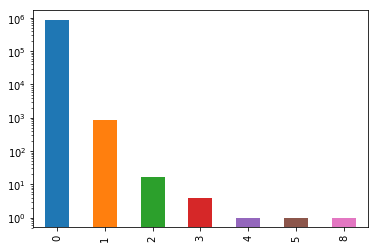

In [79]:
hist_kil = data['NUMBER OF PERSONS KILLED'].value_counts().sort_index()
hist_kil.plot(kind='bar',logy=True)

**Summary of time of accident.**

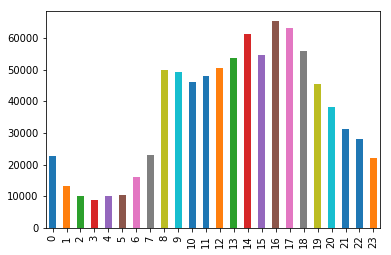

In [78]:
hist_hour = data.TIME.dt.hour.value_counts().sort_index()
hist_hour.plot(kind='bar')

In [80]:
data['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Passing Too Closely', 'Unspecified', 'Tire Failure/Inadequate',
       'Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Backing Unsafely', 'Unsafe Lane Changing',
       'Traffic Control Disregarded', 'Passing or Lane Usage Improper',
       'Following Too Closely', 'Turning Improperly', 'Other Vehicular',
       'Shoulders Defective/Improper', 'Outside Car Distraction',
       'Driver Inexperience', 'Unsafe Speed', 'Oversized Vehicle',
       'Aggressive Driving/Road Rage', 'Failure to Keep Right',
       'Fell Asleep', 'View Obstructed/Limited',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Passenger Distraction', 'Obstruction/Debris',
       'Reaction to Uninvolved Vehicle', 'Brakes Defective',
       'Pavement Defective', 'Alcohol Involvement', 'Vehicle Vandalism',
       'Glare', 'Illnes', 'Lost Consciousness', nan, 'Animals Action',
       'Pavement Slippery', 'Accelerator Defective',
       'Driverless/Runaway Vehicle',

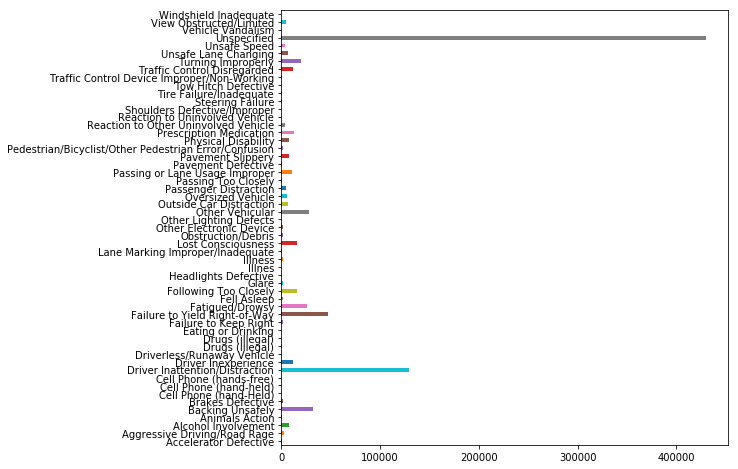

In [86]:
plt.figure(figsize=(8,8))
hist_fact = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_index()
hist_fact.plot(kind='barh')

In [ ]:
fig = plt.figure(figsize = (12,8))

m = Basemap(projection = 'ortho', lon_0 = -73.700272, lat_0 = 40.477399,
            llcrnrx=-300000, llcrnry=100000, urcrnrx=300000, urcrnry=600000, 
            resolution = 'h')

m.drawcoastlines(linewidth = 1)
m.drawcountries()
plt.show()
#m.etopo(scale=0.5, alpha=0.0)
m.bluemarble(scale=0.5)

In [262]:
binned_longs = pd.cut(data.LONGITUDE, bins=20).apply(lambda val:(val.left+val.mid)/2.0)
binned_lats  = pd.cut(data.LATITUDE, bins=20).apply(lambda val:(val.left+val.mid)/2.0)

In [264]:
uniq_binned_longs = binned_longs.unique()
uniq_binned_lats  = binned_lats.unique()

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-74.25909,40.477399,-73.700272,40.917577&bboxSR=4326&imageSR=4326&size=600,472&dpi=96&format=png32&f=image


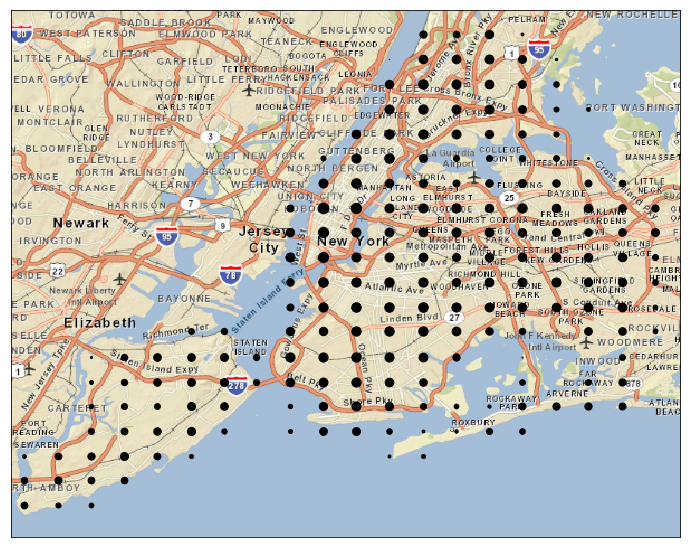

In [315]:
plt.figure(figsize=(12, 12))
m = Basemap(projection='cyl', resolution='c', llcrnrlon=-74.259090, llcrnrlat=40.477399, urcrnrlon=-73.700272, urcrnrlat=40.917577, area_thresh=0.01)
m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels=600, verbose=True)
for long in uniq_binned_longs:
    for lat in uniq_binned_lats:
        count = ((binned_longs == long) & (binned_lats == lat)).sum()
        if count > 0:
            x,y = m(long,lat)
            m.plot(x,y,'ko',markersize=np.log(count))
plt.show()

In [318]:
## Draw Conclusions using Inferential Statistics

In [319]:
data.groupby(['BOROUGH'])['NUMBER OF PERSONS KILLED'].mean()

BOROUGH
BRONX            0.001075
BROOKLYN         0.001128
MANHATTAN        0.000750
QUEENS           0.001179
STATEN ISLAND    0.001367
Name: NUMBER OF PERSONS KILLED, dtype: float64

In [320]:
data.groupby(['BOROUGH'])['NUMBER OF PERSONS KILLED'].value_counts()

BOROUGH        NUMBER OF PERSONS KILLED
BRONX          0                           117081
               1                              124
               2                                1
BROOKLYN       0                           270952
               1                              292
               2                                4
               3                                2
MANHATTAN      0                           218515
               1                              156
               8                                1
QUEENS         0                           229587
               1                              238
               2                                9
               3                                2
               4                                1
               5                                1
STATEN ISLAND  0                            40178
               1                               51
               2                                2
Name: NUMB

In [324]:
data.groupby(by=data.TIME.dt.hour>18)['NUMBER OF PERSONS KILLED'].mean()

TIME
False    0.000965
True     0.001425
Name: NUMBER OF PERSONS KILLED, dtype: float64

In [327]:
x = data.groupby(by=data.TIME.dt.hour>18)['TIME']

In [329]:
x.value_counts()

ValueError: Duplicated level name: "TIME", assigned to level 1, is already used for level 0.